In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv(r'C:\Users\user\Desktop\Kaggle\Titanic\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\Kaggle\Titanic\test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Get to know the dataset

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Combine Train & Test
- after merged two dataset, total entry should = 891 + 418 = 1309 and 12 columns, with 418 NA in Survived

In [11]:
combine = pd.concat([train,test],sort = False,ignore_index = True)

In [12]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
combine.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Basic info
- The dataset has 12 variables and 1309 entries
- Variable Age and Fare are float64

#### Missing value
- Age = 263
- Cabin = 1014
- Embarked = 2
- Survived = 418

## Variables

In [14]:
combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
combine.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data cleansing 
- PassengerID, Survived, Pclass, SibSp, Parch -> no change need to be done at this stage
- Age: fillna with mean, there are decimals, since it could be any number from 0 to 80, choose to classify each by decade
- Cabin: letter + digits, might separate them and check if any relation with other variables
- Name: contains title, extract the title
- Sex, Embarked: convert to label
- Fare: group by range?
- Ticket: ????

In [107]:
# create a copy, so can always get orgin combined dataset
combine1 = combine.copy()

#### Name -> Title
- substr title(two method)
    - write a for loop
    - write a function, so can be used again


#### Method 1: write a for loop

In [ ]:
le = preprocessing.LabelEncoder()
for i in range(combine1.shape[0]):
    combine1.loc[i,'Title'] = re.search(r"(?<=,).*?(?=\.)",combine1.loc[i,'Name'])[0].strip()
combine1['Title_1'] = le.fit_transform(combine1['Title'])
print(combine1['Title'].unique())

#### Method 2: write a function, so can be used again

In [108]:
def get_title(name):
    return re.search(r"(?<=,).*?(?=\.)",name)[0].strip()

In [109]:
combine1['Title'] = np.nan
for i in range(len(combine1['Name'])):
    combine1.loc[i,'Title'] = get_title(combine1['Name'][i])

In [110]:
combine1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [111]:
combine1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


#### 不同的Title有不同的平均年齡，用這個資訊來補Age的missing values

In [112]:
title_avgage = combine1.groupby('Title')['Age'].mean().to_dict()
title_avgage

{'Capt': 70.0,
 'Col': 54.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482641509433963,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0,
 'the Countess': 33.0}

#### Age
先用剛剛依照Title的平均年齡來補missing values

In [113]:
missing_Age_index = list(combine1[combine1['Age'].isnull() == True].index)

In [114]:
for i in range(len(missing_Age_index)):
    combine1.loc[missing_Age_index[i],'Age'] = combine1.loc[missing_Age_index[i],'Title']

In [115]:
combine1.loc[missing_Age_index,'Age'] = combine1.loc[missing_Age_index,'Age'].map(title_avgage)

確認Age是不是還有missing values

In [90]:
combine1['Age'].isnull().sum()

0

In [116]:
combine1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.2522,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.2522,0,0,359309,8.0500,NaN,S,Mr
1308,1309,NaN,3,"Peter, Master. Michael J",male,5.48264,1,1,2668,22.3583,NaN,C,Master


補完missing values後，想把大家都歸類，不然年齡數值太多，10年為一單位

In [117]:
combine1['Age_Group'] = np.floor_divide(combine1['Age'],10)  #.astype(int)

稍微看一下年齡分布

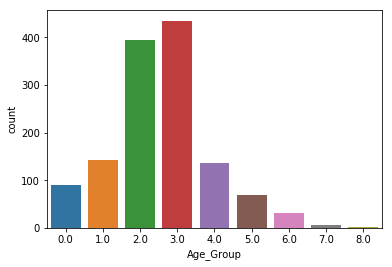

In [125]:
sns.countplot(combine1['Age_Group'])

In [ ]:
............................................................

#### Embarked

In [9]:
# missing value
train['Embarked'].groupby(train['Embarked']).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [12]:
# fill in the missings by the most value = 'S'
train['Embarked'].fillna('S', inplace = True)